## LauzHack 2023 - Team RHR
AWS Challenge

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/MyDrive/2023 가을/LauzHack/requirements_paperboat.txt' '/content/requirements_paperboat.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -r /content/requirements_paperboat.txt


In [3]:
import requests
from flask import Flask, request, Response
from scihub import SciHub
import os
import re
import random
import json
import datetime
from bs4 import BeautifulSoup
from pyzotero import zotero
from google.cloud import texttospeech as tts
import wave
import langchain
from crossref.restful import Works
from semanticscholar import SemanticScholar
import torch
from transformers import AutoModel, AutoTokenizer
import numpy as np
import scipy
import matplotlib.pyplot as plt
from typing import Sequence
import openai
import pandas as pd
import tiktoken
from openai.embeddings_utils import get_embedding
from dotenv import load_dotenv, find_dotenv
import warnings
warnings.filterwarnings("ignore")
import langchain
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain.chat_models import ChatOpenAI
from langchain.agents import tool
from datetime import date
from dotenv import load_dotenv, find_dotenv
from semanticscholar import SemanticScholar

from tqdm import tqdm
import docx

In [4]:
# read in all the API keys

!cp '/content/drive/MyDrive/2023 가을/LauzHack/openai_key.txt' '/content/openai_key.txt'

# OpenAI
try:
    with open('openai_key.txt', 'r') as file:
        openai_key = file.read()
except Exception as e:
        print(e)

try:
    with open('pinecone_key.txt', 'r') as file:
        pineconekey = file.read()
except Exception as e:
        print(e)

# Telegram
try:
    with open('telegram_key.txt', 'r') as file:
        TOKEN = file.read()
except Exception as e:
        print(e)

[Errno 2] No such file or directory: 'pinecone_key.txt'
[Errno 2] No such file or directory: 'telegram_key.txt'


In [5]:
openai.api_key = openai_key

In [6]:
mykey = openai_key

## Review Distilling

In [7]:
# get the csv

!cp '/content/drive/MyDrive/2023 가을/LauzHack/Amazon_Unlocked_Mobile.csv' '/content/Amazon_Unlocked_Mobile.csv'

input_file = "Amazon_Unlocked_Mobile.csv"
df = pd.read_csv(input_file)
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [8]:
# get only first product

product_name = df["Product Name"][0]
print(product_name)

# Filter the df to contain reviews of a single product
single_df = df[df['Product Name'] == product_name]

single_df

"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [9]:
def summarize_review(review):
    retries = 1
    summary = None

    while retries > 0:
        messages = [
            {"role": "system", "content": "You are an AI language model trained to summarize product reviews based on its pros and cons and the resulting customer's sentiment."},
            {"role": "user", "content": f"Summarize the following product reviews. \
            The summary should be a list of tuples of strings. The first element of the tuple should be \
            a sentiment expressed by the customer, and the second element should be the reason which caused the sentiment. \
            The sentiment should be 'positive' for pros and 'negative' for cons. \
            For example, if the review is 'Everything works well, it is great, but the short battery is very frustrating.', \
            the summary should be [('positive', 'works well'), ('negative', 'short battery')]: {review}"}
        ]

        completion2 = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=70,
            n=1,
            stop=None,
            temperature=0.9
        )

        response_text = completion2.choices[0].message.content
        print(response_text)
        if response_text:
            summary = response_text
            break
        else:
            retries -= 1
            time.sleep(1)
    else:
        summary = "Summary not available."

    return summary

# already have inputfile as single_df

# Analyze the reviews and store the results
summaries = []

for review in tqdm(single_df["Reviews"], desc="Processing reviews"):
    summary = summarize_review(review)
    summaries.append(summary)

single_df["Summary"] = summaries

# Save the results to a new Excel file
output_file = "reviews_summaries.csv"
single_df.to_csv(output_file, index=False)


# Save the results to a new Word file

# output_file = "reviews_summaries.docx"
# doc = docx.Document()

# Add table with headers
# table = doc.add_table(rows=1, cols=2)
# header_cells = table.rows[0].cells
# header_cells[0].text = 'Product_Review'
# header_cells[1].text = 'Summary'

# Add table content
# for index, row in single_df.iterrows():
#     row_cells = table.add_row().cells
#     row_cells[0].text = str(row['Product_Review'])
#     row_cells[1].text = row['summary']

# doc.save(output_file)

Processing reviews:   3%|▎         | 1/37 [00:08<04:51,  8.10s/it]

[('positive', 'found this used phone'), ('positive', 'phone not used hard'), ('positive', 'Son liked his old one'), ('positive', 'didn\'t want an upgrade'), ('positive', 'appreciate seller\'s honesty'), ('positive', 'recommend this seller highly'), ('positive', 'would buy from them again


Processing reviews:   5%|▌         | 2/37 [00:14<04:10,  7.15s/it]

[('positive', 'nice phone'), ('positive', 'nice upgrade from my Pantech Revue'), ('positive', 'clean setup'), ('positive', 'easy setup'), ('positive', 'fantastic Android phone'), ('positive', 'perfect size for surfing and social media'), ('positive', 'great phone Samsung')]


Processing reviews:   8%|▊         | 3/37 [00:21<04:00,  7.08s/it]

[('positive', 'easy to use'), ('positive', 'good value for money'), ('positive', 'comfortable to wear'), ('negative', 'poor sound quality'), ('positive', 'durable construction'), ('positive', 'good battery life'), ('negative', 'poor call quality')]: Overall satisfaction with the product, but some


Processing reviews:  11%|█         | 4/37 [00:23<02:48,  5.10s/it]

[('positive', 'works good'), ('negative', 'goes slow sometimes')]


Processing reviews:  14%|█▎        | 5/37 [00:26<02:19,  4.35s/it]

[('positive', 'Great phone to replace my lost phone'), ('negative', 'volume up button does not work')]


Processing reviews:  16%|█▌        | 6/37 [00:29<02:02,  3.96s/it]

[('negative', 'phone with problems'), ('negative', 'did not charge'), ('negative', 'cracked on the side'), ('negative', 'damaged goods'), ('negative', 'trying to charge it another way does not work')]


Processing reviews:  19%|█▉        | 7/37 [00:33<01:53,  3.77s/it]

[('negative', 'charging port was loose'), ('negative', 'needed a new battery'), ('negative', 'phone should not have been sold in that state')]


Processing reviews:  22%|██▏       | 8/37 [00:38<02:07,  4.38s/it]

[('positive', 'looks good'), ('negative', 'wouldn\'t stay charged'), ('negative', 'had to buy new battery'), ('negative', 'couldn\'t stay charged long'), ('negative', 'money lost'), ('negative', 'bad buying experience')]


Processing reviews:  24%|██▍       | 9/37 [00:45<02:22,  5.11s/it]

[('positive', 'missed the keyboard'), ('positive', 'smaller compact size'), ('positive', 'basic functions of a smart phone'), ('negative', 'not as powerful as newer cell phones'), ('negative', 'slower performance with more installed applications'), ('positive', 'great camera'), ('positive', 'great video quality'), ('


Processing reviews:  27%|██▋       | 10/37 [00:49<02:06,  4.68s/it]

[('positive', 'battery life is great'), ('positive', 'responsive to touch'), ('negative', 'screen goes black and requires multiple button presses to re-illuminate')]


Processing reviews:  30%|██▉       | 11/37 [00:51<01:39,  3.84s/it]

[('negative', 'caused many problems'), ('positive', 'replacement is good')]


Processing reviews:  32%|███▏      | 12/37 [00:55<01:35,  3.82s/it]

[('positive', 'great product'),
 ('positive', 'fast delivery'),
 ('positive', 'fully functional phone'),
 ('negative', 'little blemish on the side')]


Processing reviews:  35%|███▌      | 13/37 [00:58<01:31,  3.80s/it]

[('positive', 'best customer service'), ('positive', 'quickly fixed the issue'), ('positive', 'pleased with the product'), ('positive', 'will buy again')]


Processing reviews:  38%|███▊      | 14/37 [01:02<01:25,  3.70s/it]

[('negative', 'disappointed about phone and service'), ('negative', 'phone went out'), ('negative', 'not handling issue promptly'), ('negative', 'stuck with no phone'), ('negative', 'lost money on unused service'), ('negative', 'no mailing label to return item'), ('negative', 'bad first purchase experience'), ('


Processing reviews:  41%|████      | 15/37 [01:05<01:15,  3.43s/it]

[('positive', 'replacement for same model'), 
('positive', 'fast delivery'), 
('positive', 'phone looks better than described'), 
('positive', 'able to transfer data with no problems'), 
('positive', 'highly recommend this seller')]


Processing reviews:  43%|████▎     | 16/37 [01:07<01:03,  3.04s/it]

[('positive', 'loved it'), ('negative', 'SD card slot issue'), ('negative', 'trouble shooting required')]


Processing reviews:  46%|████▌     | 17/37 [01:12<01:11,  3.59s/it]

[('positive', 'phone with keyboard and touch screen'), ('positive', 'best phone'), ('positive', 'love it'), ('negative', 'had to clean device with service provider'), ('positive', 'well worth it')]


Processing reviews:  49%|████▊     | 18/37 [01:13<00:57,  3.04s/it]

[('positive', 'great purchase'), ('positive', 'phone works wonderful')]


Processing reviews:  51%|█████▏    | 19/37 [01:20<01:11,  3.97s/it]

[('positive', 'love the phone'), ('positive', 'does everything I need'), ('positive', 'works great'), ('negative', 'phone didn\'t come with a micro sd card'), ('negative', 'couldn\'t use the camera until got the card'), ('positive', 'no problems getting these activated at Sprint')]


Processing reviews:  54%|█████▍    | 20/37 [01:26<01:20,  4.75s/it]

[('positive', 'great display'), ('negative', 'poor battery life'), ('positive', 'smooth performance'), ('negative', 'lack of headphone jack'), ('positive', 'good camera quality'), ('positive', 'sleek design'), ('negative', 'expensive price')]


Processing reviews:  57%|█████▋    | 21/37 [01:32<01:20,  5.04s/it]

[('positive', 'great overall performance'), ('negative', 'battery life is disappointing'), ('positive', 'excellent camera quality'), ('positive', 'fast charging feature'), ('negative', 'price is on the higher side'), ('positive', 'sleek design and comfortable grip')]


Processing reviews:  59%|█████▉    | 22/37 [01:40<01:29,  5.97s/it]

[('positive', 'beautiful screen'),
 ('positive', 'capable of running chrome'),
 ('positive', 'take good pictures'),
 ('positive', 'the keyboard is comfy'),
 ('positive', 'fits in my pocket and fit my hands'),
 ('positive', 'plays really good videos and games'),
 ('negative', 'no Bluetooth'),
 ('negative', '


Processing reviews:  62%|██████▏   | 23/37 [01:44<01:13,  5.25s/it]

[('negative', 'ESN not clear'), ('negative', 'received second phone with unclear ESN'), ('negative', 'did not receive refund for shipping')]


Processing reviews:  65%|██████▍   | 24/37 [01:47<01:01,  4.76s/it]

[('positive', 'good phone'), ('negative', 'little slow'), ('negative', 'phone old'), ('positive', 'great phone'), ('positive', 'great deal')]


Processing reviews:  68%|██████▊   | 25/37 [01:52<00:56,  4.71s/it]

[('negative', "Phone's speaker little low"), ('positive', 'Overall very happy with the phone'), ('positive', 'I would purchase another cell phone from Chubbietech'), ('positive', 'I am satisfied')]


Processing reviews:  70%|███████   | 26/37 [01:54<00:45,  4.11s/it]

[('positive', 'great and in good condition'), ('positive', 'Daughter is happy to be an Android user now')]


Processing reviews:  73%|███████▎  | 27/37 [02:00<00:44,  4.41s/it]

[('positive', 'better than iPhone 4s'), ('negative', 'randomly crashes'), ('negative', 'randomly powers off'), ('positive', 'good for storage space'), ('positive', 'good for battery usage'), ('positive', 'good camera')]


Processing reviews:  76%|███████▌  | 28/37 [02:01<00:31,  3.51s/it]

[('positive', 'works great'), ('positive', 'no problems at all')]


Processing reviews:  78%|███████▊  | 29/37 [02:03<00:23,  2.96s/it]

[('negative', 'not in good condition'), ('positive', 'works well')]


Processing reviews:  81%|████████  | 30/37 [02:06<00:22,  3.22s/it]

[('positive', 'great screen resolution'), ('negative', 'storage is low'), ('negative', 'need an SD card to do anything'), ('negative', 'not compatible with Freedompop')]


Processing reviews:  84%|████████▍ | 31/37 [02:08<00:16,  2.78s/it]

[('positive', 'as described'), ('positive', 'fast ship')]


Processing reviews:  86%|████████▋ | 32/37 [02:10<00:11,  2.34s/it]

[('positive', 'Perfect in every way.')]


Processing reviews:  89%|████████▉ | 33/37 [02:12<00:09,  2.27s/it]

[('negative', 'bad charger port'), ('negative', 'want to send it back')]


Processing reviews:  92%|█████████▏| 34/37 [02:13<00:06,  2.12s/it]

[('positive', 'great phone'), ('positive', 'easy to use')]


Processing reviews:  95%|█████████▍| 35/37 [02:16<00:04,  2.33s/it]

[('positive', 'great phone'), ('negative', 'old and needs replacement'), ('positive', 'great while it lasted')]


Processing reviews:  97%|█████████▋| 36/37 [02:19<00:02,  2.45s/it]

[('positive', 'great condition'), ('positive', 'great price'), ('positive', 'brings back great memories')]


Processing reviews: 100%|██████████| 37/37 [02:20<00:00,  3.81s/it]

[('positive', 'met all expectations'), ('positive', 'great price')]


## OpenAI vector embeddings

In [10]:
# ChatGPT vector embeddings

# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

# load & inspect dataset
input_datapath = "reviews_summaries.csv"
Df = pd.read_csv(input_datapath, index_col=0)
Df = Df.dropna()
Df.head(2)

,Brand Name,Price,Rating,Reviews,Review Votes,Summary
Product Name,,,,,,
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('positive', 'found this used phone'), ('posi..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('positive', 'nice phone'), ('positive', 'nic..."


In [11]:

encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
Df["n_tokens"] = Df.Summary.apply(lambda x: len(encoding.encode(x)))
Df = Df[Df.n_tokens <= max_tokens].tail(1000)

Df

,Brand Name,Price,Rating,Reviews,Review Votes,Summary,n_tokens
Product Name,,,,,,,
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('positive', 'found this used phone'), ('posi...",70
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('positive', 'nice phone'), ('positive', 'nic...",64
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,Very pleased,0.0,"[('positive', 'easy to use'), ('positive', 'go...",70
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[('positive', 'works good'), ('negative', 'goe...",17
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[('positive', 'Great phone to replace my lost ...",24
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,"[('negative', 'phone with problems'), ('negati...",49
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,"[('negative', 'charging port was loose'), ('ne...",33
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,"[('positive', 'looks good'), ('negative', 'wou...",55
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,"[('positive', 'missed the keyboard'), ('positi...",70


In [12]:
# this may take a few minutes
Df["Embedding"] = Df.Summary.apply(lambda x: get_embedding(x, engine=embedding_model))

In [13]:
Df.to_csv("reviews_with_embeddings.csv", index=False)

Df

,Brand Name,Price,Rating,Reviews,Review Votes,Summary,n_tokens,Embedding
Product Name,,,,,,,,
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[('positive', 'found this used phone'), ('posi...",70,"[-0.018871435895562172, 0.011653915047645569, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[('positive', 'nice phone'), ('positive', 'nic...",64,"[-0.024908164516091347, 0.013963455334305763, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,Very pleased,0.0,"[('positive', 'easy to use'), ('positive', 'go...",70,"[-0.009599080309271812, 0.016237180680036545, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[('positive', 'works good'), ('negative', 'goe...",17,"[-0.036380521953105927, 0.01951015554368496, 0..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[('positive', 'Great phone to replace my lost ...",24,"[-0.031073782593011856, 0.006388283800333738, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,"[('negative', 'phone with problems'), ('negati...",49,"[-0.03260539844632149, 0.00978896301239729, 0...."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,"[('negative', 'charging port was loose'), ('ne...",33,"[-0.017955541610717773, 0.012668237090110779, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,"[('positive', 'looks good'), ('negative', 'wou...",55,"[-0.026353083550930023, 0.012377114035189152, ..."
"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,"[('positive', 'missed the keyboard'), ('positi...",70,"[-0.022841637954115868, 0.028586994856595993, ..."


In [14]:
# how long are the review embeddings?
# we could now treat each review as a 1536-features element of a vector space to do clusterings etc!!
# much more here: https://platform.openai.com/docs/guides/embeddings/use-cases

print(len(Df["Embedding"].iloc[1,]))
print(len(Df["Embedding"].iloc[17,]))

1536
1536


In [15]:
Df = pd.read_csv('reviews_with_embeddings.csv')
Df['Embedding'] = Df.Embedding.apply(eval).apply(np.array)

In [16]:
!pip install scikit-learn ast

  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

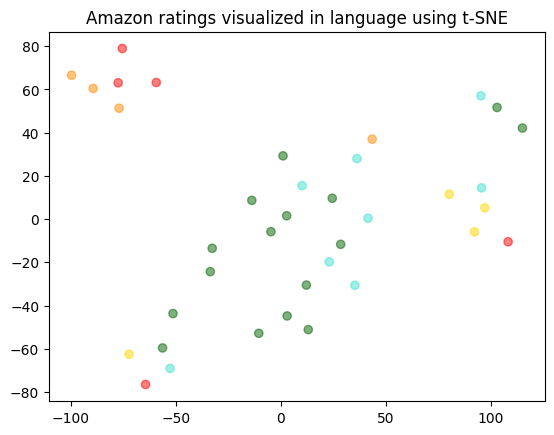

In [17]:
# visualizing embedding in 2d
# reduce dimensionality

import sklearn
from sklearn.manifold import TSNE
from ast import literal_eval
import matplotlib

###

Df = pd.read_csv('reviews_with_embeddings.csv')
matrix = np.array(Df.Embedding.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='random', learning_rate=100)
vis_dims = tsne.fit_transform(matrix)

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = Df.Rating.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.5)
plt.title("Amazon ratings visualized in language using t-SNE")

In [18]:
# clustering

# load data

Df = pd.read_csv('reviews_with_embeddings.csv')
Df["Embedding"] = Df.Embedding.apply(literal_eval).apply(np.array)  # convert string to numpy array
matrix = np.vstack(Df.Embedding.values)
matrix.shape

(37, 1536)

In [19]:
# find clusters

from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
Df["Cluster"] = labels

cluster_review_counts = Df.groupby('Cluster').size()
print(cluster_review_counts)

Df.groupby("Cluster").Rating.mean().sort_values()

Cluster
0     6
1    13
2     9
3     9
dtype: int64


Cluster
0    1.500000
3    3.333333
2    4.444444
1    4.461538
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

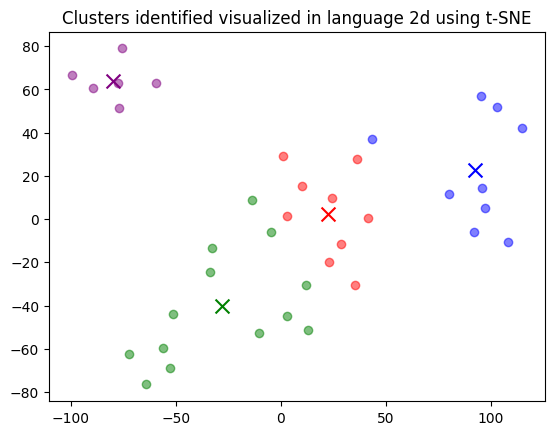

In [20]:
# visualize

tsne = TSNE(n_components=2, perplexity=5, random_state=42, init="random", learning_rate=100)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue", "yellow"]):
    xs = np.array(x)[Df.Cluster == category]
    ys = np.array(y)[Df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.5)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


In [21]:
# name clusters

# Reading a review which belong to each group.

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    # Filter DataFrame for the current cluster
    cluster_reviews = Df[Df.Cluster == i]

    # Extract reviews, ratings, summaries, and review votes for the current cluster
    reviews = cluster_reviews['Reviews']
    ratings = cluster_reviews['Rating']
    summaries = cluster_reviews['Summary']
    review_votes = cluster_reviews['Review Votes']

    # Concatenate all reviews for the cluster into a single string
    reviews_text = "\n".join(reviews)

    # Use all reviews as prompt for OpenAI's completion
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following customer reviews have in common? Focus on sentiments of customers.\n\nCustomer reviews:\n"""\n{reviews_text}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    # Display individual details for each review in the cluster
    for j in range(len(reviews)):
        print(ratings.values[j], end=", ")
        print(summaries.values[j], end=":  ")
        print(review_votes.values[j], end="\n")

    print("-" * 100)


Cluster 0 Theme:  The customers are all dissatisfied with their purchase and are requesting a refund or a replacement.
1, [('negative', 'phone with problems'), ('negative', 'did not charge'), ('negative', 'cracked on the side'), ('negative', 'damaged goods'), ('negative', 'trying to charge it another way does not work')]:  1.0
2, [('negative', 'charging port was loose'), ('negative', 'needed a new battery'), ('negative', 'phone should not have been sold in that state')]:  0.0
2, [('positive', 'looks good'), ('negative', 'wouldn\'t stay charged'), ('negative', 'had to buy new battery'), ('negative', 'couldn\'t stay charged long'), ('negative', 'money lost'), ('negative', 'bad buying experience')]:  0.0
1, [('negative', 'disappointed about phone and service'), ('negative', 'phone went out'), ('negative', 'not handling issue promptly'), ('negative', 'stuck with no phone'), ('negative', 'lost money on unused service'), ('negative', 'no mailing label to return item'), ('negative', 'bad firs

In [22]:
# reliability of issues

from collections import defaultdict
from wordcloud import WordCloud

def calculate_word_importance(reviews, review_votes):
    word_counts = defaultdict(int)
    word_votes = defaultdict(int)

    clean_reviews = [preprocess_text(review) for review in reviews]

    # Tokenize each review and update word counts and total votes for each word
    for i, review in enumerate(clean_reviews):
        words = review.split()  # Split review text into words
        votes = review_votes.iloc[i]  # Assuming review votes for the current review

        # Update word counts and cumulative votes for each word in the current review
        for word in words:
            word_counts[word] += 1
            word_votes[word] += votes+1  # Add 1 to avoid all zeros

    # do not want to include positive and negative
    word_votes["positive"] = 0
    word_votes["negative"] = 0

    # Calculate average votes per word by dividing total votes by word counts
    word_importance = {word: word_votes[word] / word_counts[word] for word in word_counts}

    return word_importance

def preprocess_text(text):
    # Remove specified characters using str.replace()
    text = text.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace("'", '').replace(",", '').replace("\\", "'")
    return text


word_importance:  {'negative': 0.0, 'phone': 4.833333333333333, 'with': 8.0, 'problems': 2.0, 'did': 11.0, 'not': 7.833333333333333, 'charge': 2.0, 'cracked': 2.0, 'on': 2.0, 'the': 2.0, 'side': 2.0, 'damaged': 2.0, 'goods': 2.0, 'trying': 2.0, 'to': 1.5, 'it': 1.5, 'another': 2.0, 'way': 2.0, 'does': 2.0, 'work': 2.0, 'charging': 1.0, 'port': 1.0, 'was': 1.0, 'loose': 1.0, 'needed': 1.0, 'a': 1.0, 'new': 1.0, 'battery': 1.0, 'should': 1.0, 'have': 1.0, 'been': 1.0, 'sold': 1.0, 'in': 1.0, 'that': 1.0, 'state': 1.0, 'positive': 0.0, 'looks': 1.0, 'good': 1.0, "wouldn't": 1.0, 'stay': 1.0, 'charged': 1.0, 'had': 1.0, 'buy': 1.0, "couldn't": 1.0, 'long': 1.0, 'money': 1.5, 'lost': 1.5, 'bad': 1.3333333333333333, 'buying': 1.0, 'experience': 1.5, 'disappointed': 2.0, 'about': 2.0, 'and': 2.0, 'service': 2.0, 'went': 2.0, 'out': 2.0, 'handling': 2.0, 'issue': 2.0, 'promptly': 2.0, 'stuck': 2.0, 'no': 2.0, 'unused': 2.0, 'mailing': 2.0, 'label': 2.0, 'return': 2.0, 'item': 2.0, 'first': 2.0

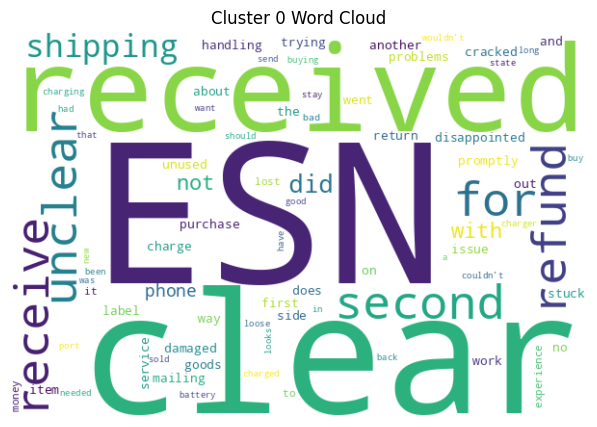

word_importance:  {'positive': 0.0, 'works': 1.0, 'good': 1.0, 'negative': 0.0, 'goes': 1.0, 'slow': 1.0, 'sometimes': 1.0, 'caused': 1.0, 'many': 1.0, 'problems': 1.3333333333333333, 'replacement': 1.5, 'is': 1.0, 'great': 1.0, 'product': 2.0, 'fast': 1.3333333333333333, 'delivery': 1.5, 'fully': 1.0, 'functional': 1.0, 'phone': 1.3333333333333333, 'little': 1.0, 'blemish': 1.0, 'on': 1.0, 'the': 2.3333333333333335, 'side': 1.0, 'best': 3.0, 'customer': 3.0, 'service': 3.0, 'quickly': 3.0, 'fixed': 3.0, 'issue': 3.0, 'pleased': 3.0, 'with': 2.5, 'will': 3.0, 'buy': 3.0, 'again': 3.0, 'for': 2.0, 'same': 2.0, 'model': 2.0, 'looks': 2.0, 'better': 2.0, 'than': 2.0, 'described': 1.5, 'able': 2.0, 'to': 1.5, 'transfer': 2.0, 'data': 2.0, 'no': 1.5, 'highly': 2.0, 'recommend': 2.0, 'this': 2.0, 'seller': 2.0, 'purchase': 1.0, 'wonderful': 1.0, 'and': 1.0, 'in': 1.0, 'condition': 1.0, 'Daughter': 1.0, 'happy': 1.0, 'be': 1.0, 'an': 1.0, 'Android': 1.0, 'user': 1.0, 'now': 1.0, 'at': 1.0, 'a

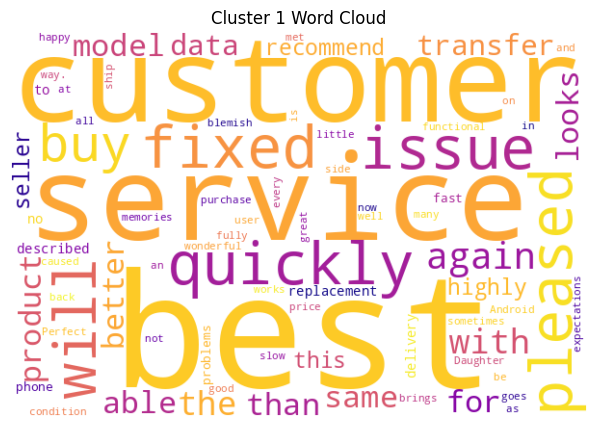

word_importance:  {'positive': 0.0, 'found': 2.0, 'this': 2.0, 'used': 2.0, 'phone': 1.8888888888888888, 'not': 1.5, 'hard': 2.0, 'Son': 2.0, 'liked': 2.0, 'his': 2.0, 'old': 1.3333333333333333, 'one': 2.0, "didn't": 2.0, 'want': 2.0, 'an': 2.0, 'upgrade': 1.5, 'appreciate': 2.0, "seller's": 2.0, 'honesty': 2.0, 'recommend': 2.0, 'seller': 2.0, 'highly': 2.0, 'would': 1.5, 'buy': 2.0, 'from': 1.3333333333333333, 'them': 2.0, 'again': 2.0, 'nice': 1.0, 'my': 1.0, 'Pantech': 1.0, 'Revue': 1.0, 'clean': 4.0, 'setup': 1.0, 'easy': 1.0, 'fantastic': 1.0, 'Android': 1.0, 'perfect': 1.0, 'size': 1.0, 'for': 1.0, 'surfing': 1.0, 'and': 3.0, 'social': 1.0, 'media': 1.0, 'great': 1.1428571428571428, 'Samsung': 1.0, 'Great': 1.0, 'to': 3.0, 'replace': 1.0, 'lost': 1.0, 'negative': 0.0, 'volume': 1.0, 'up': 1.0, 'button': 1.0, 'does': 1.5, 'work': 1.0, 'with': 4.25, 'keyboard': 7.0, 'touch': 7.0, 'screen': 7.0, 'best': 7.0, 'love': 4.5, 'it': 5.0, 'had': 7.0, 'device': 7.0, 'service': 7.0, 'provid

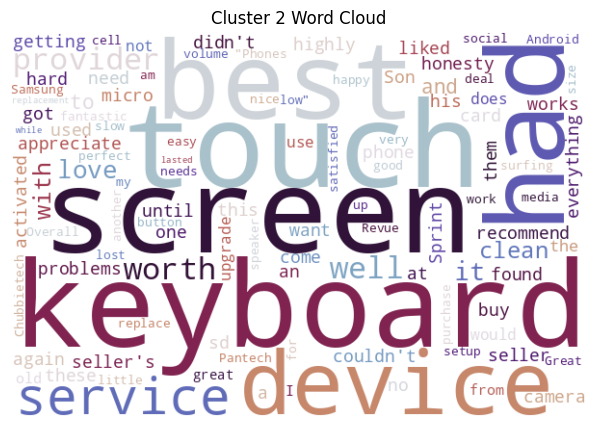

word_importance:  {'positive': 0.0, 'easy': 1.0, 'to': 1.0, 'use': 1.0, 'good': 1.0, 'value': 1.0, 'for': 1.0, 'money': 1.0, 'comfortable': 1.0, 'wear': 1.0, 'negative': 0.0, 'poor': 1.0, 'sound': 1.0, 'quality': 1.0, 'durable': 1.0, 'construction': 1.0, 'battery': 1.0, 'life': 1.0, 'call': 1.0, 'quality:': 1.0, 'Overall': 1.0, 'satisfaction': 1.0, 'with': 1.0, 'the': 1.0, 'product': 1.0, 'but': 1.0, 'some': 1.0, 'missed': 1.0, 'keyboard': 1.0, 'smaller': 1.0, 'compact': 1.0, 'size': 1.0, 'basic': 1.0, 'functions': 1.0, 'of': 1.0, 'a': 1.0, 'smart': 1.0, 'phone': 1.0, 'not': 1.0, 'as': 1.0, 'powerful': 1.0, 'newer': 1.0, 'cell': 1.0, 'phones': 1.0, 'slower': 1.0, 'performance': 1.0, 'more': 1.0, 'installed': 1.0, 'applications': 1.0, 'great': 1.0, 'camera': 1.0, 'video': 1.0, 'is': 1.0, 'responsive': 1.0, 'touch': 1.0, 'screen': 1.0, 'goes': 1.0, 'black': 1.0, 'and': 1.0, 'requires': 1.0, 'multiple': 1.0, 'button': 1.0, 'presses': 1.0, 're-illuminate': 1.0, 'loved': 1.0, 'it': 1.0, 'SD

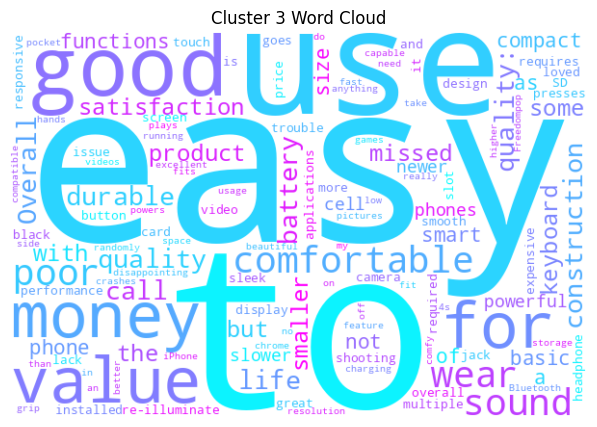

In [23]:
# visualize with wordcloud

Df = pd.read_csv('reviews_with_embeddings.csv')
Df["Cluster"] = labels

# colormaps
colormaps = ['viridis', 'plasma', 'twilight', 'cool', 'copper']

for cluster in range(n_clusters):
    # Filter reviews belonging to the current cluster
    reviews_cluster = Df[Df['Cluster'] == cluster]['Summary']
    review_votes_cluster = Df[Df['Cluster'] == cluster]['Review Votes']

    # Process reviews to calculate word importance based on review votes
    word_importance = calculate_word_importance(reviews_cluster, review_votes_cluster)

    # Remove NaN values or replace them with a default value (e.g., 0)
    word_importance = {word: importance for word, importance in word_importance.items() if not pd.isnull(importance)}
    word_importance = {word: importance if not pd.isnull(importance) else 0 for word, importance in word_importance.items()}

    print("word_importance: ", word_importance)

    # Create WordCloud with word sizes based on the calculated importance metric
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap=colormaps[cluster]).generate_from_frequencies(word_importance)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.axis('off')
    plt.show()
